<a href="https://colab.research.google.com/github/feyokokama/personal-gallery/blob/main/Projeto_de_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run
- pra rodar certinho:
vai em "Runtime" e depois "Run all"

- quando pedir as chaves, coloca essas para baixar o dataset
{"username":"felipeokokama","key":"2a52a3416261297b90d33c3efcae29d2"}



#Instalando dependências

In [ ]:
!pip install opendatasets


#Importando o dataset

In [ ]:
import opendatasets as od
import pandas

# Download dataset no Colab
od.download("https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: felipeokokama
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023


100%|██████████| 25.4k/25.4k [00:00<00:00, 39.8MB/s]

In [ ]:
import pandas as pds

file =('data-science-salaries-2023/ds_salaries.csv')
df_raw = pds.read_csv(file)

# Display csv
df_raw

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


#Tratamento de dados


In [ ]:
df = df_raw.copy()

In [ ]:
# Procurar quantos valores null
print(df.isnull().sum())

# Verificar e remover duplicatas
df.drop_duplicates(inplace=True)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# Converter 'experience_level' para numérico
df['experience_level'] = df['experience_level'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})

# Converter 'company_size' para numérico
df['company_size'] = df['company_size'].map({'S': 1, 'M': 2, 'L': 3})


In [ ]:
# Tratando job_title, pois o mesmo apresenta 93 tipos de jobs e alguns possuem mínimas aparições
unique_job_titles = df['job_title'].unique()
print(f"Total unique job titles: {len(unique_job_titles)}")

# job_title com menos de ceil(2584/93) = 28 serão considerados 'Other'

# Calcula o limite
min_occurrences = 28
print(f'Min occurrences: {min_occurrences}')

# Conta quantas vezes cada job_title aparece (uma vez só, fora do loop)
counts = df['job_title'].value_counts()

# Função para aplicar em cada job_title, substitui por 'Other' se menor que o limite
def group_jobs(job):
    if counts[job] < min_occurrences:
        return 'Other'
    else:
        return job

# Aplica na coluna inteira
df['job_title'] = df['job_title'].apply(group_jobs)

# Verifica resultado
print(df['job_title'].value_counts())


Total unique job titles: 93
Min occurrences: 28
job_title
Data Engineer                598
Data Scientist               538
Other                        476
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Applied Scientist             31
Name: count, dtype: int64


#Inspeção do dataset

Data Science Job Salaries Dataset contains 11 columns, each are:

    work_year: The year the salary was paid.
    experience_level: The experience level in the job during the year
    employment_type: The type of employment for the role
    job_title: The role worked in during the year.
    salary: The total gross salary amount paid.
    salary_currency: The currency of the salary paid as an ISO 4217 currency code.
    salaryinusd: The salary in USD
    employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
    remote_ratio: The overall amount of work done remotely
    company_location: The country of the employer's main office or contracting branch
    company_size: The median number of people that worked for the company during the year


In [ ]:
# número de linhas e colunas
print("Formato (linhas, colunas):", df.shape)
print("====================================================================1500000==========================================")

# info de cada coluna
print(df.info())
print("==============================================================================================================")

# boxplot dados
(df.describe())

Formato (linhas, colunas): (2584, 11)
====================================================================1500000==========================================
<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   int64 
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 242.2+ KB
None


,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size
count,2584.000000,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000
mean,2022.301084,2.571207,2.103653e+05,133409.280186,50.483746,2.101393
std,0.749179,0.726922,8.080375e+05,67136.837329,48.163707,0.452735
min,2020.000000,1.000000,6.000000e+03,5132.000000,0.000000,1.000000
25%,2022.000000,2.000000,9.000000e+04,84975.000000,0.000000,2.000000
50%,2022.000000,3.000000,1.346300e+05,130000.000000,50.000000,2.000000
75%,2023.000000,3.000000,1.825625e+05,175000.000000,100.000000,2.000000
max,2023.000000,4.000000,3.040000e+07,450000.000000,100.000000,3.000000


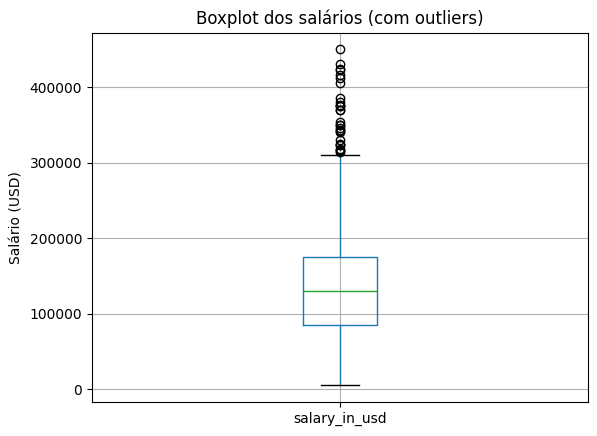

Quantidade de outliers abaixo do limite: 0
Quantidade de outliers acima do limite: 29
Total original de registros: 2584
Total após remover outliers (1ª etapa): 2555
Total após 2ª limpeza (sem outliers visuais): 2551


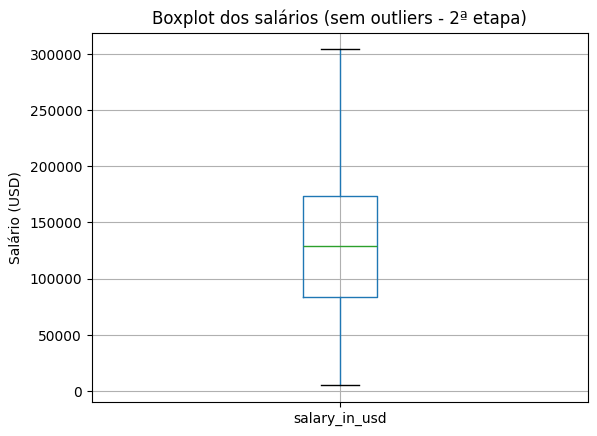

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,FT,Other,80000,EUR,85847,ES,100,ES,3
1,2023,2,CT,ML Engineer,30000,USD,30000,US,100,US,1
2,2023,2,CT,ML Engineer,25500,USD,25500,US,100,US,1
3,2023,3,FT,Data Scientist,175000,USD,175000,CA,100,CA,2
4,2023,3,FT,Data Scientist,120000,USD,120000,CA,100,CA,2
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,3,FT,Other,165000,USD,165000,US,100,US,3
3751,2021,2,FT,Other,151000,USD,151000,US,100,US,3
3752,2020,1,FT,Data Scientist,105000,USD,105000,US,100,US,1
3753,2020,1,CT,Other,100000,USD,100000,US,100,US,3


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Mostrar boxplot inicial para salários, com todos os dados (incluindo possíveis outliers)
df.boxplot(column='salary_in_usd')
plt.title('Boxplot dos salários (com outliers)')
plt.ylabel('Salário (USD)')
plt.show()

# Calcular os quartis e o intervalo interquartil (IQR)
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1

# Definir os limites para considerar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificar os outliers abaixo do limite inferior e acima do limite superior
outliers_abaixo = df[df['salary_in_usd'] < limite_inferior]
outliers_acima = df[df['salary_in_usd'] > limite_superior]

print(f'Quantidade de outliers abaixo do limite: {len(outliers_abaixo)}')
print(f'Quantidade de outliers acima do limite: {len(outliers_acima)}')

# Criar um novo DataFrame sem os outliers detectados
df_sem_outliers = df[(df['salary_in_usd'] >= limite_inferior) & (df['salary_in_usd'] <= limite_superior)].copy()

print(f'Total original de registros: {len(df)}')
print(f'Total após remover outliers (1ª etapa): {len(df_sem_outliers)}')

# Recalcular IQR com o DataFrame limpo para nova filtragem
q1_novo = df_sem_outliers['salary_in_usd'].quantile(0.25)
q3_novo = df_sem_outliers['salary_in_usd'].quantile(0.75)
iqr_novo = q3_novo - q1_novo

limite_inferior_novo = q1_novo - 1.5 * iqr_novo
limite_superior_novo = q3_novo + 1.5 * iqr_novo

# Remover possíveis outliers restantes após a 1ª limpeza
df_sem_outliers_final = df_sem_outliers[
    (df_sem_outliers['salary_in_usd'] >= limite_inferior_novo) &
    (df_sem_outliers['salary_in_usd'] <= limite_superior_novo)
].copy()

print(f'Total após 2ª limpeza (sem outliers visuais): {len(df_sem_outliers_final)}')

# Mostrar boxplot final, já limpo de outliers
df_sem_outliers_final.boxplot(column='salary_in_usd')
plt.title('Boxplot dos salários (sem outliers - 2ª etapa)')
plt.ylabel('Salário (USD)')
plt.show()

df_sem_outliers_final

#df_sem_outliers_final = df # descomentar para recolocar os outliers



- Maioria dos salários entre 85.000 e 175.000
- Mediana (130k) está ligeiramente abaixo da média (133k), implica na presença de dados com valores altos.

- Apresenta apenas outliers para cima. Certos dados irão comprometer futuras análises, portanto foram retirados os outliers.

Matriz de correlação:
                  salary_in_usd  work_year  experience_level  remote_ratio  \
salary_in_usd          1.000000   0.264622          0.482000     -0.087071   
work_year              0.264622   1.000000          0.211205     -0.216233   
experience_level       0.482000   0.211205          1.000000     -0.057104   
remote_ratio          -0.087071  -0.216233         -0.057104      1.000000   
company_size          -0.021832  -0.139817         -0.070260      0.038072   

                  company_size  
salary_in_usd        -0.021832  
work_year            -0.139817  
experience_level     -0.070260  
remote_ratio          0.038072  
company_size          1.000000  


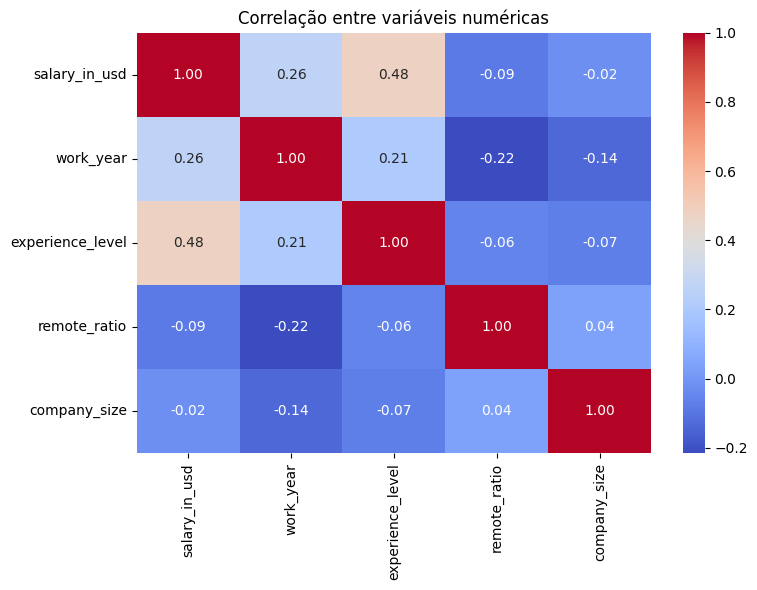

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Usando o DataFrame já limpo (sem outliers)
df = df_sem_outliers_final.copy()

# Colunas numéricas para analisar
cols = ['salary_in_usd', 'work_year', 'experience_level', 'remote_ratio', 'company_size']

# Calcular a correlação entre essas variáveis
corr = df[cols].corr()

print("Matriz de correlação:")
print(corr)

# Mostrar gráfico de calor das correlações
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()


1 - correlação positiva perfeita

0 - correlação inexistente


- work_year e salary_in_usd: Correlação positiva fraca/moderada
- experience_level e salary_in_usd: Correlação moderada positiva
- remote_ratio e salary_in_ud: Correlação negativa fraca
- company_size e salary_in_usd: Correlação negativa muito fraca
- experince_level e work_year: Correlacão positiva moderada (Ao passar dos anos, o nivel de experiência das pessoas na pesquisa subiu)

#Plotagem da relação entre variável alvo (salary_in_usd) e as outras variáveis

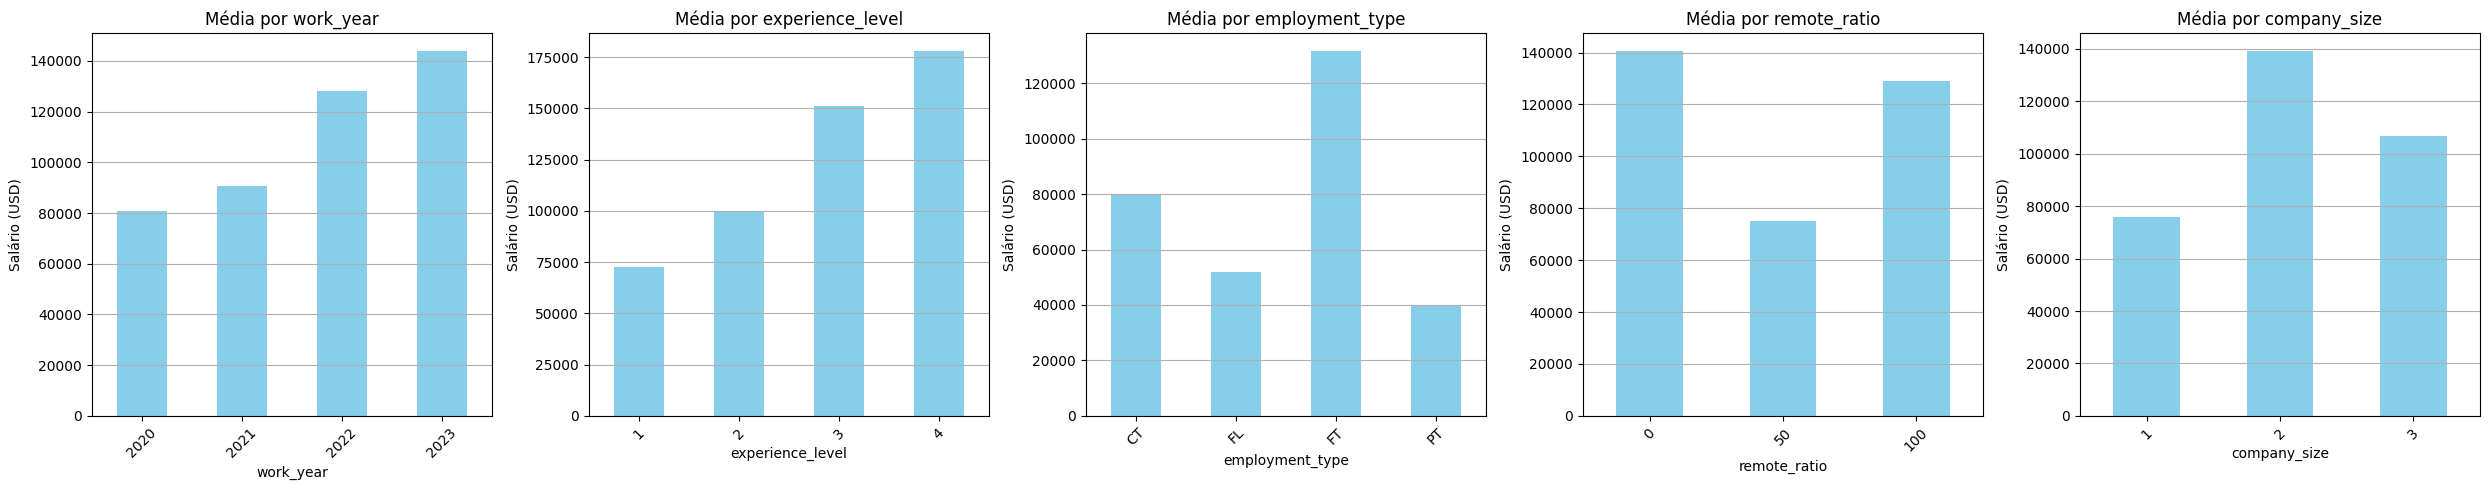

In [ ]:
import matplotlib.pyplot as plt

# PLotagem da relação de salary_in_usd com as variáveis quatitativas de todos os anos

# Varíaveis do eixo x
variaveis = [
    'work_year',
    'experience_level',
    'employment_type',
    'remote_ratio',
    'company_size'
]

# Número de gráficos
n = len(variaveis)

# Define o layout: 1 linha com n colunas
fig, axes = plt.subplots(1, n, figsize=(5*n, 5))  # 5 de largura por gráfico

# Loop sobre variáveis e eixos
for i, var in enumerate(variaveis):
    ax = axes[i]

    media_por_categoria = df_sem_outliers_final.groupby(var)['salary_in_usd'].mean()
    media_por_categoria.plot(kind='bar', color='skyblue', ax=ax)

    ax.set_title(f'Média por {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Salário (USD)')
    ax.grid(axis='y')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


o código pega a média de salários das variavéus do eixo x

- Salário de datascience cresceu de 2020 a 2023.
- Quanto maior a experiência, maior o salário
- FT(Full-time) e CT (Contract) recebem mais, FL (Freelance) e PT (Part-time) recebem menos.
- 100% presencial e 100% home office recebem mais, híbrido recebem menos.
- Companhias de porte médio oferecem melhores salários, seguidos de grande porte e pequeno porte.

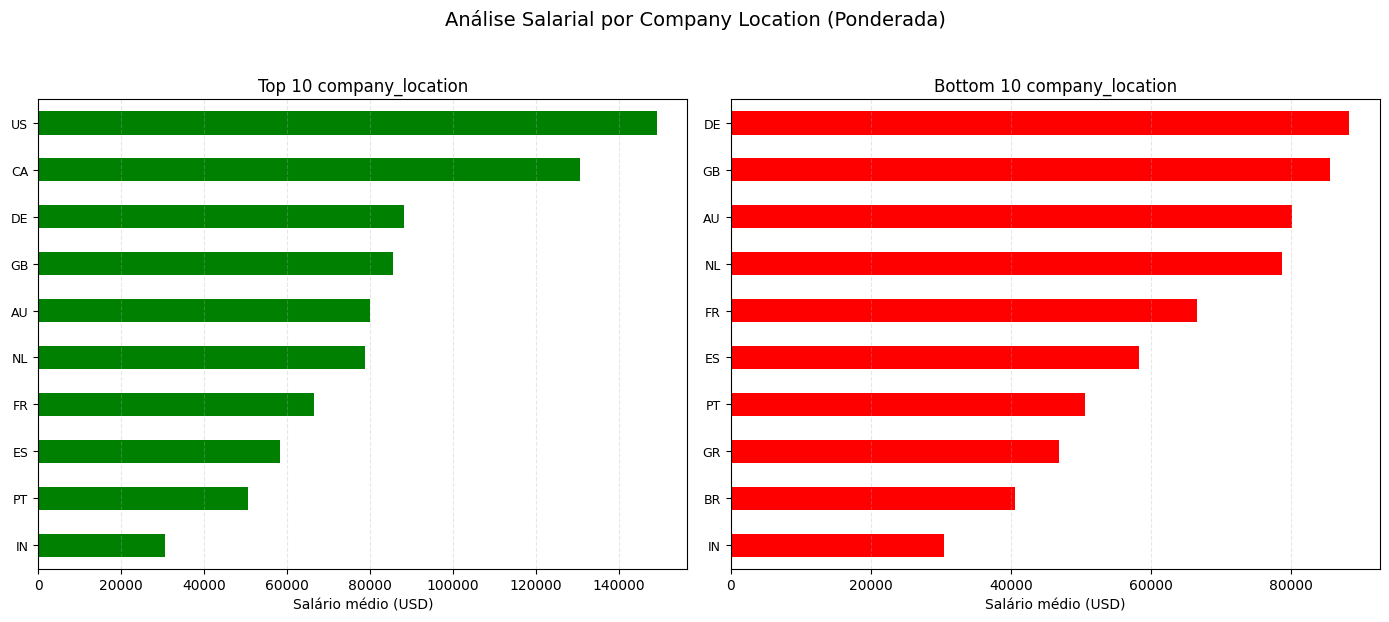

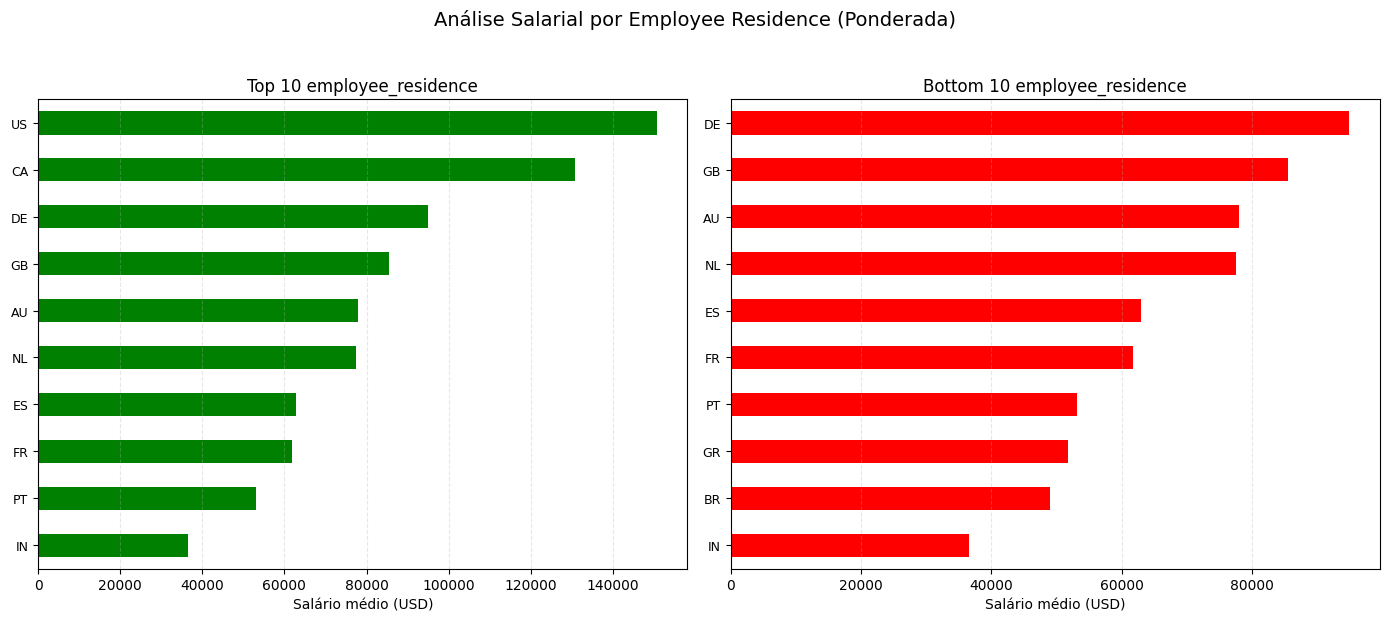

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')  # <- força o estilo padrão

variaveis = ['company_location', 'employee_residence']

for var in variaveis:
    # Agrupamento e médias
    grouped = df_sem_outliers_final.groupby(var)
    media = grouped['salary_in_usd'].mean()
    contagem = grouped.size()

    # Filtrar países com >10 registros
    mask = contagem > 10
    media_filtrada = media[mask]
    contagem_filtrada = contagem[mask]

    # Score ponderado com log10 do volume
    peso = np.log10(contagem_filtrada)
    score = media_filtrada * peso

    # Top e bottom 10
    top10 = media_filtrada.loc[score.nlargest(10).index].sort_values()
    bottom10 = media_filtrada.loc[score.nsmallest(10).index].sort_values()

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    top10.plot.barh(color='green', ax=ax1)
    ax1.set_title(f'Top 10 {var}', fontsize=12)
    ax1.set_xlabel('Salário médio (USD)')
    ax1.set_ylabel('')
    ax1.grid(True, axis='x', linestyle='--', alpha=0.3)

    bottom10.plot.barh(color='red', ax=ax2)
    ax2.set_title(f'Bottom 10 {var}', fontsize=12)
    ax2.set_xlabel('Salário médio (USD)')
    ax2.set_ylabel('')
    ax2.grid(True, axis='x', linestyle='--', alpha=0.3)

    # Ajustes finos
    for ax in (ax1, ax2):
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.tick_params(axis='y', labelsize=9)

    # Título geral
    plt.suptitle(f'Análise Salarial por {var.replace("_", " ").title()} (Ponderada)', fontsize=14, y=1.03)

    plt.tight_layout()
    plt.show()


O código agrupa os dados por localização da empresa e residência do funcionário, calcula o salário médio ponderado pelo logaritmo da contagem de registros (atribui pesos que influenciam como uma função logaritmica, faz o salário crescer menos quanto mais aparições do país houver) e exibe os 10 maiores e menores valores médios em gráficos de barras horizontais.


- Países com maior e menor valorização de salário com peso

- Pessoas de x nacionalidade com maior e menor valorização d7e salário com peso

- Pelo gráfico, países x que pagam altos salários possuem pessoas com alto salário da nacionalidade x. O contrário também acontece para países com menores sálarios.

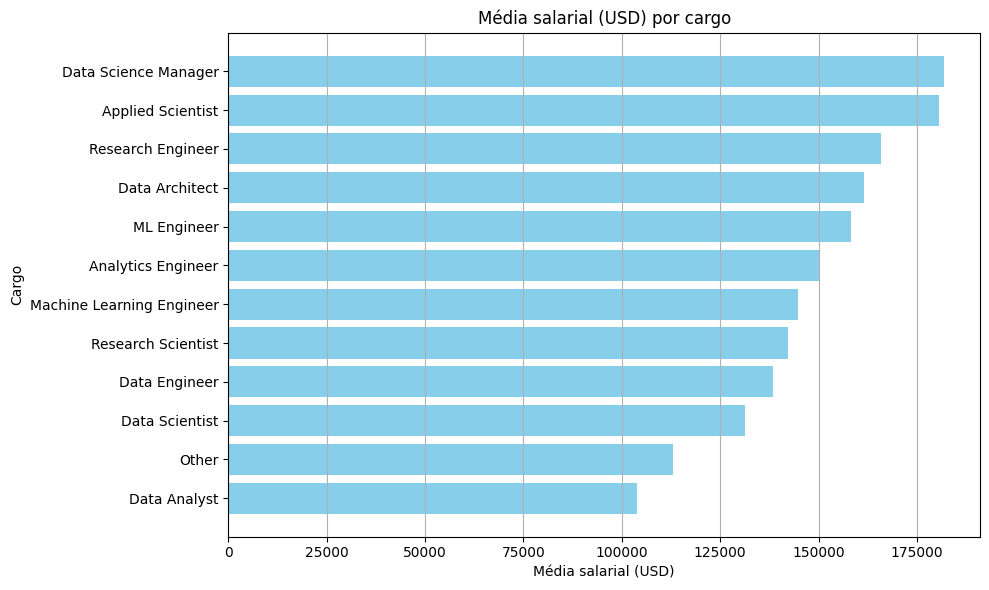

In [ ]:
import matplotlib.pyplot as plt

media_salarial_por_job = df_sem_outliers_final.groupby('job_title')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(media_salarial_por_job.index, media_salarial_por_job.values, color='skyblue')

plt.title('Média salarial (USD) por cargo')
plt.xlabel('Média salarial (USD)')
plt.ylabel('Cargo')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


O código agrupa os dados por cargo, calcula a média salarial em dólar para cada um.

"Other" representam cargos com poucas aparições (tratamento de dados)

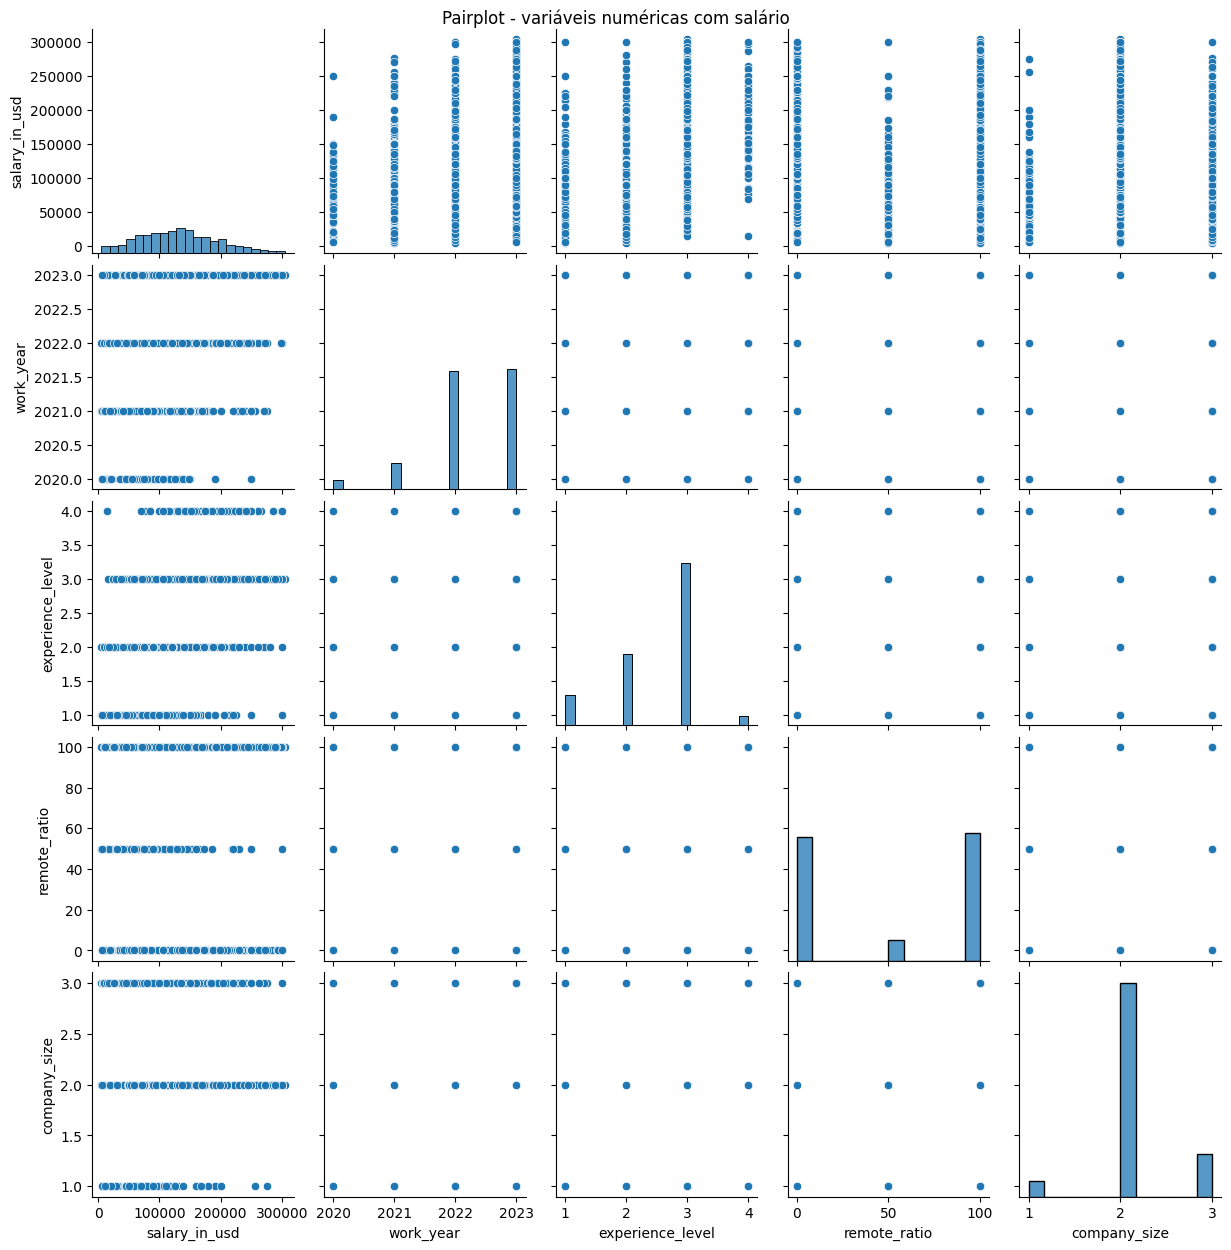

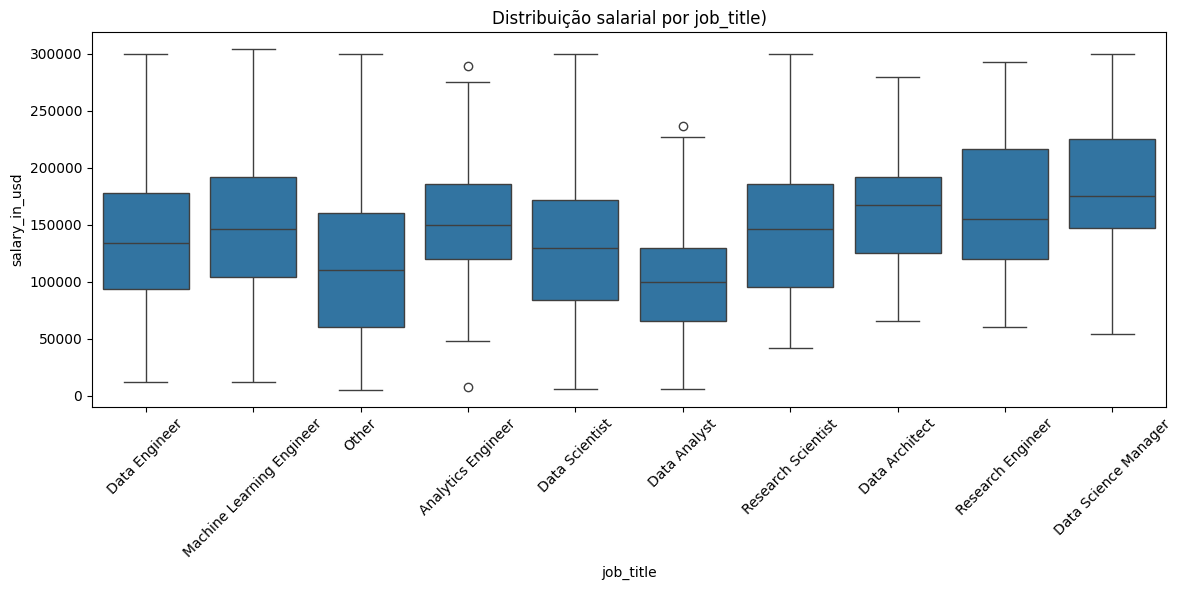

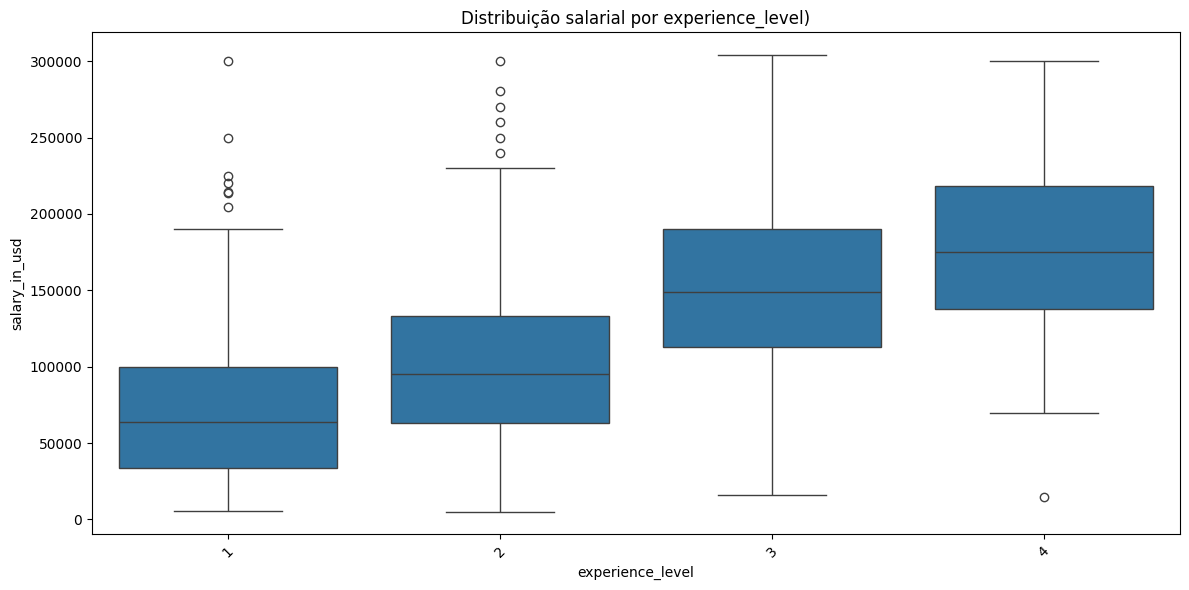

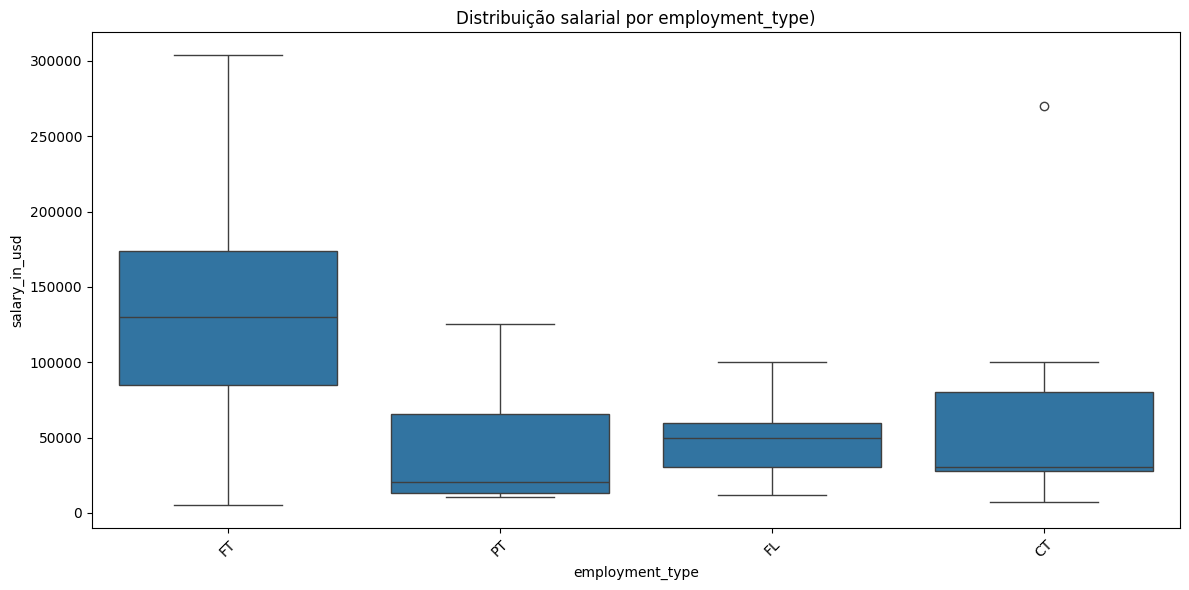

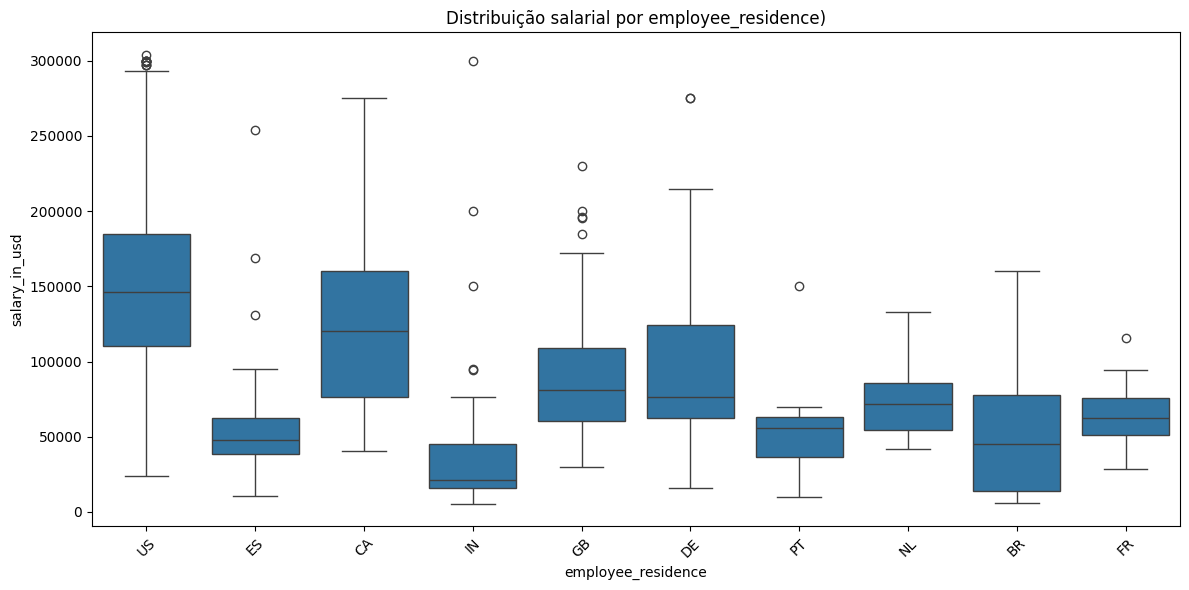

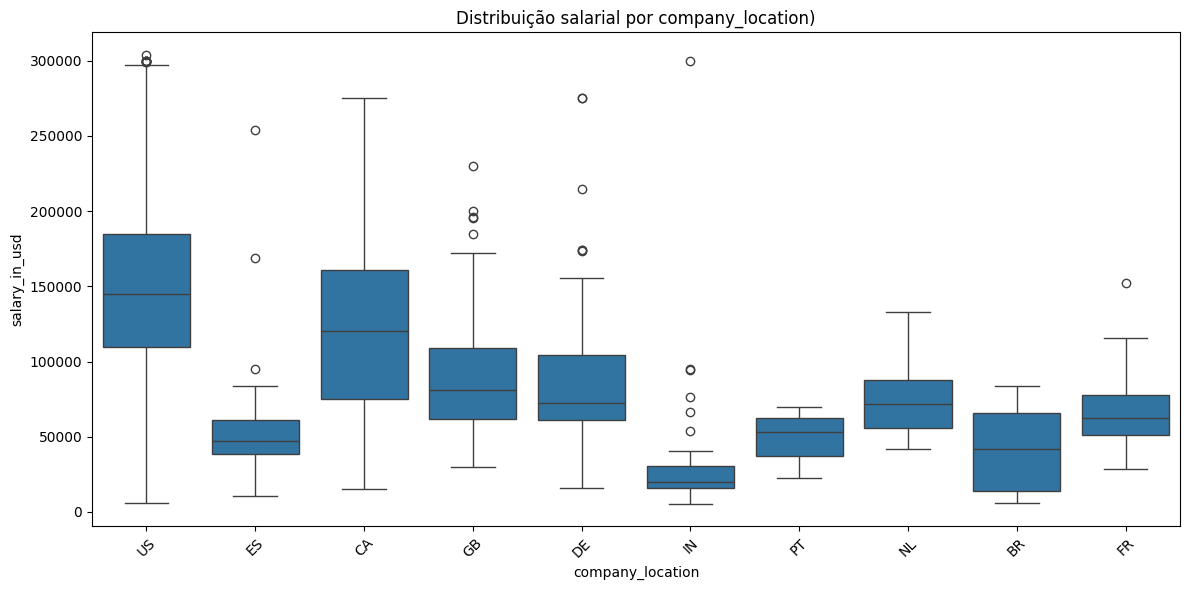

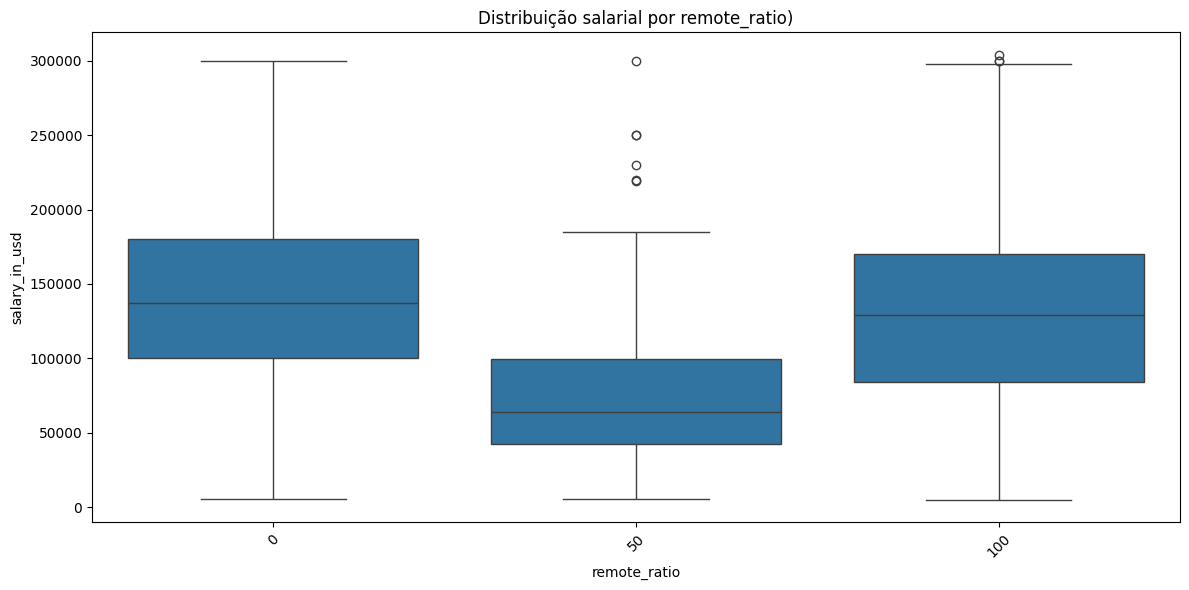

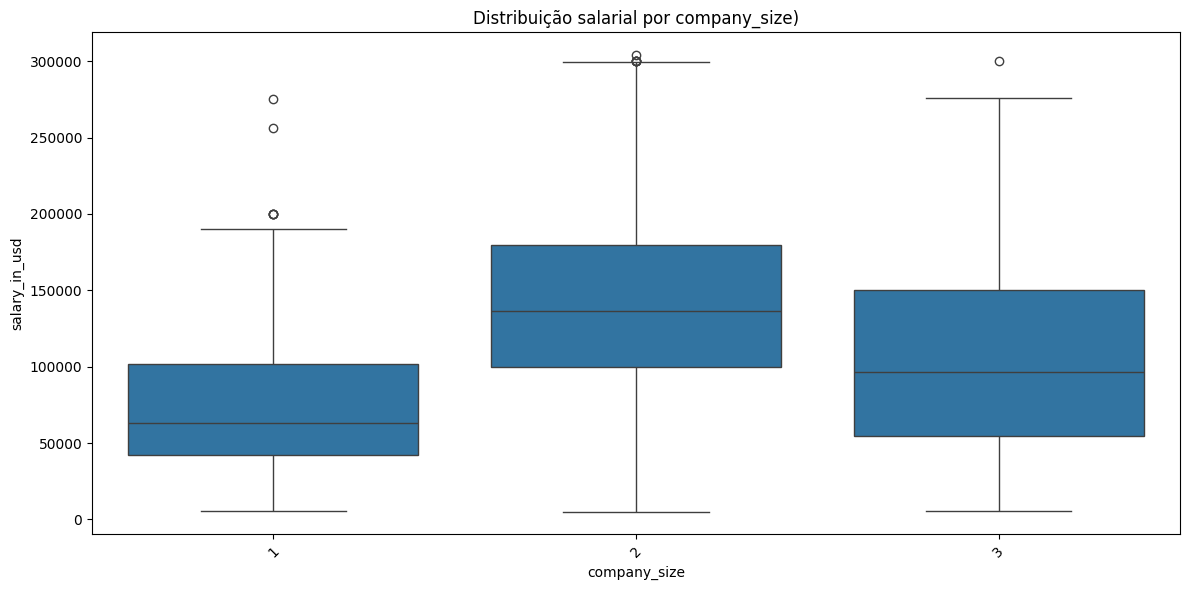

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Amostra dos dados para não ficar pesado
df_plot = df.sample(2000)

# Variáveis numéricas para pairplot
cols_num = ['salary_in_usd', 'work_year', 'experience_level', 'remote_ratio', 'company_size']

# Pairplot entre variáveis numéricas
sns.pairplot(df_plot[cols_num])
plt.suptitle('Pairplot - variáveis numéricas com salário', y=1)
plt.show()

variaveis_categoricas = ['job_title', 'experience_level', 'employment_type', 'employee_residence', 'company_location', 'remote_ratio', 'company_size']

top_n = 10

for var in variaveis_categoricas:
    if df_plot[var].nunique() > top_n:
        top_categorias = df_plot[var].value_counts().nlargest(top_n).index
        df_temp = df_plot[df_plot[var].isin(top_categorias)]
    else:
        df_temp = df_plot

    plt.figure(figsize=(12,6))
    sns.boxplot(data=df_temp, x=var, y='salary_in_usd')
    plt.title(f'Distribuição salarial por {var})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Pairplot das variáveis numéricas, tem comportamento semelhante aos gráficos da relação de salary_in_usd com as variáveis quatitativas

Boxplot das distribuição das variáveis númericas e categorias em relação ao salário

#Análises

##Analisar os países com maior emigração e imigração de datascience
- Analisar países alvos de datascience.
- Analisar países de origem de datascience.

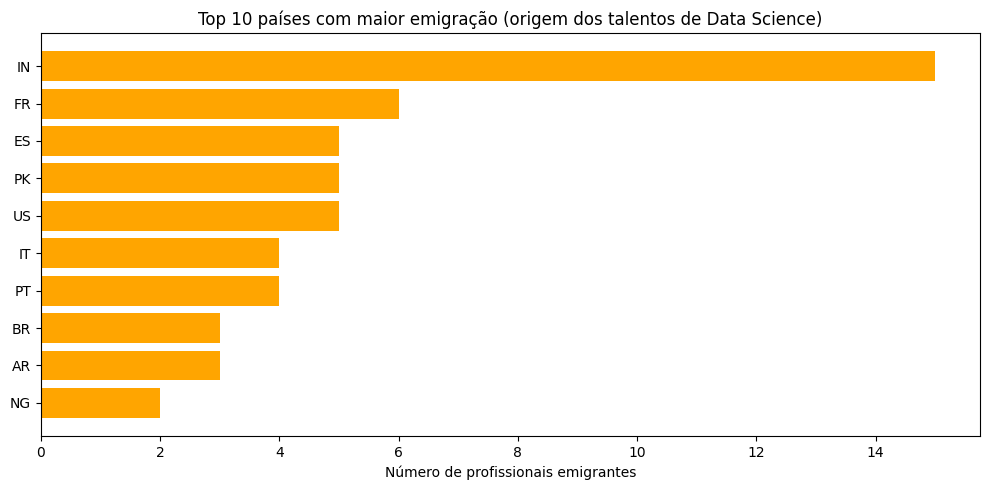

In [ ]:
# CONTAGEM ABSOLUTA

# Pessoas que trabalham em empresas fora de seu país de residência
df_emigrantes = df_sem_outliers_final[df_sem_outliers_final['employee_residence'] != df_sem_outliers_final['company_location']]

# Contar de onde saem (país de residência)
emigracao = df_emigrantes['employee_residence'].value_counts().head(10)

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(emigracao.index[::-1], emigracao.values[::-1], color='orange')
plt.title('Top 10 países com maior emigração (origem dos talentos de Data Science)')
plt.xlabel('Número de profissionais emigrantes')
plt.tight_layout()
plt.show()


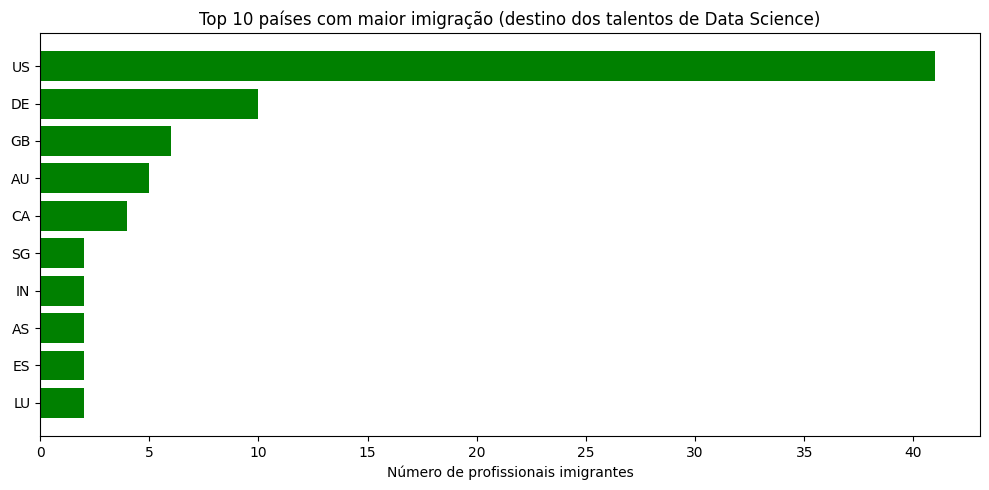

In [ ]:
# CONTAGEM ABSOLUTA

# Contar para onde vão (país da empresa)
imigracao = df_emigrantes['company_location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.barh(imigracao.index[::-1], imigracao.values[::-1], color='green')
plt.title('Top 10 países com maior imigração (destino dos talentos de Data Science)')
plt.xlabel('Número de profissionais imigrantes')
plt.tight_layout()
plt.show()


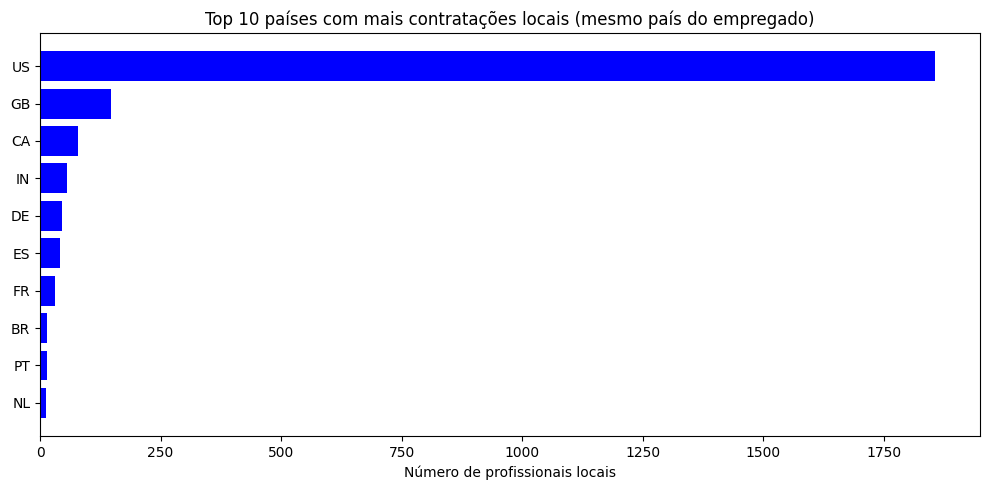

In [ ]:
# CONTAGEM ABSOLUTA

# Pessoas que trabalham no mesmo país onde moram
df_nativos = df_sem_outliers_final[df_sem_outliers_final['employee_residence'] == df_sem_outliers_final['company_location']]

nativos = df_nativos['company_location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.barh(nativos.index[::-1], nativos.values[::-1], color='blue')
plt.title('Top 10 países com mais contratações locais (mesmo país do empregado)')
plt.xlabel('Número de profissionais locais')
plt.tight_layout()
plt.show()


Top 10 países com maior peso ajustado de emigração:
employee_residence
IN    25.399406
PT    21.713804
FR    21.615313
BR    20.921208
NL    15.681217
ES    14.458764
MX    10.000000
GR     8.993177
DE     3.614691
CA     2.378862
Name: count, dtype: float64

Top 10 países com maior peso ajustado de imigração:
company_location
AU    18.934412
DE    13.797519
ES     7.470239
CA     7.001758
FR     4.703594
US     3.487975
IN     3.121764
GB     2.901455
BR          NaN
GR          NaN
Name: count, dtype: float64


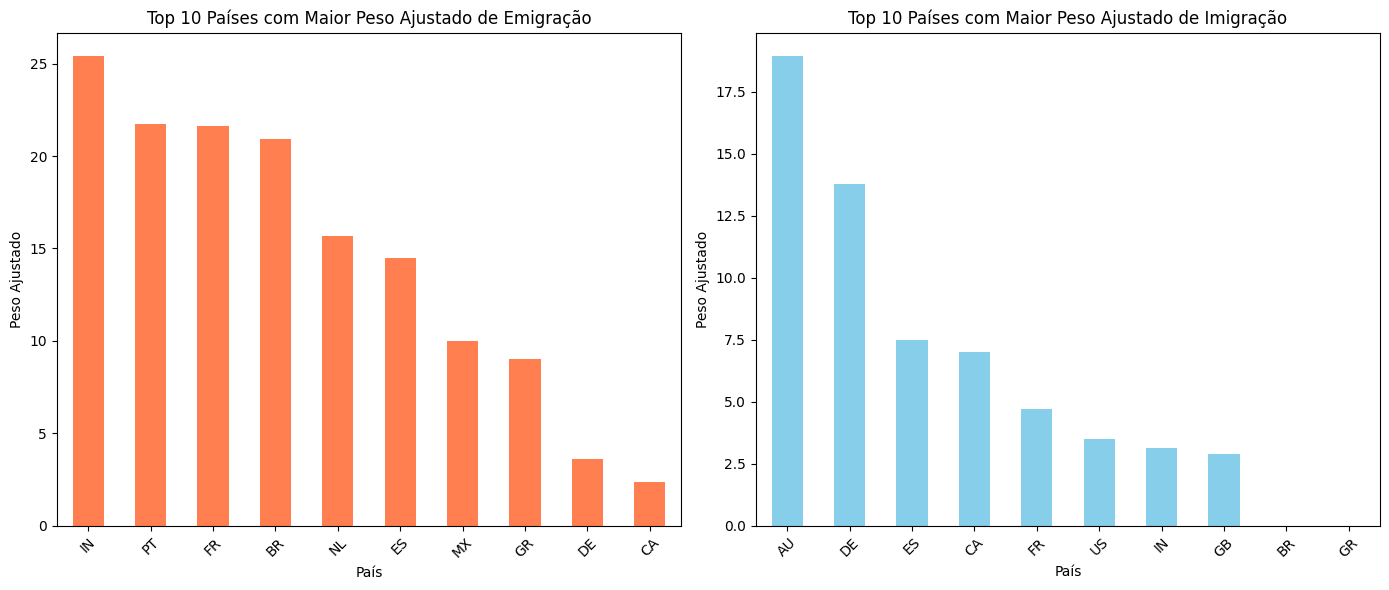

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

min_registros = 10  # limite mínimo para considerar país

# Totais por país (residência e trabalho)
total_residentes = df_sem_outliers_final['employee_residence'].value_counts()
total_empresas = df_sem_outliers_final['company_location'].value_counts()

# Filtra países com registros suficientes
paises_validos_residencia = total_residentes[total_residentes >= min_registros].index
paises_validos_empresa = total_empresas[total_empresas >= min_registros].index

df_filtrado = df_sem_outliers_final[
    (df_sem_outliers_final['employee_residence'].isin(paises_validos_residencia)) &
    (df_sem_outliers_final['company_location'].isin(paises_validos_empresa))
]

# Profissionais que trabalham fora do país onde moram
df_migrantes = df_filtrado[df_filtrado['employee_residence'] != df_filtrado['company_location']]

# Contagem absoluta
emigracao_abs = df_migrantes['employee_residence'].value_counts()
imigracao_abs = df_migrantes['company_location'].value_counts()

# Recalcula totais para filtragem
total_residentes = df_filtrado['employee_residence'].value_counts()
total_empresas = df_filtrado['company_location'].value_counts()

# Cálculo percentual
emigracao_pct = (emigracao_abs / total_residentes * 100)
imigracao_pct = (imigracao_abs / total_empresas * 100)

# Calcula peso ajustado
peso_emigracao = emigracao_pct * np.log10(total_residentes.loc[emigracao_pct.index])
peso_imigracao = imigracao_pct * np.log10(total_empresas.loc[imigracao_pct.index])

# Ordena pelos pesos ajustados (decrescente)
emigracao_ordenada = peso_emigracao.sort_values(ascending=False)
imigracao_ordenada = peso_imigracao.sort_values(ascending=False)

# Exibe resultados
print("Top 10 países com maior peso ajustado de emigração:")
print(emigracao_ordenada.head(10))

print("\nTop 10 países com maior peso ajustado de imigração:")
print(imigracao_ordenada.head(10))

# Gráficos
plt.figure(figsize=(14,6))

# Emigração
plt.subplot(1,2,1)
emigracao_ordenada.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Países com Maior Peso Ajustado de Emigração')
plt.ylabel('Peso Ajustado')
plt.xlabel('País')
plt.xticks(rotation=45)

# Imigração
plt.subplot(1,2,2)
imigracao_ordenada.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Países com Maior Peso Ajustado de Imigração')
plt.ylabel('Peso Ajustado')
plt.xlabel('País')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Países com menos de 10 resgistros foram retirados.

O peso ajustado = percentual de migrantes × logaritmo do total de profissionais no país. (função logarítmica(total de profisisonais) faz o total de profissiois crescer menos quanto maior o total de profissionais)

- Portanto, ÍNdia teria +- 25% de datascientists no exterior
- Austrália é um grande polo de imigração
- Estados Unidos se apresenta recebendo poucos imigrantes percentuais, pois grande parte dos estadounidenses trabalham nos Estados Unidos, impactando percentualmente


##Valorização do estrageiro no mercado
- Comparação da média salarial de estrangeiros com média salarial de não estrangeiros

MÉDIA SALARIAL GERAL
Não estrangeiro: $132,930.98
   Estrangeiro: $68,359.99
 Diferença abs : $-64,570.99
 Diferença %   : -48.57%

MÉDIA SALARIAL EM 2020
Não estrangeiro: $82,650.86
   Estrangeiro: $67,500.33
 Diferença abs : $-15,150.52
 Diferença %   : -18.33%

MÉDIA SALARIAL EM 2021
Não estrangeiro: $93,574.42
   Estrangeiro: $73,652.69
 Diferença abs : $-19,921.74
 Diferença %   : -21.29%

MÉDIA SALARIAL EM 2022
Não estrangeiro: $130,438.06
   Estrangeiro: $67,018.39
 Diferença abs : $-63,419.67
 Diferença %   : -48.62%

MÉDIA SALARIAL EM 2023
Não estrangeiro: $144,924.06
   Estrangeiro: $60,744.00
 Diferença abs : $-84,180.06
 Diferença %   : -58.09%



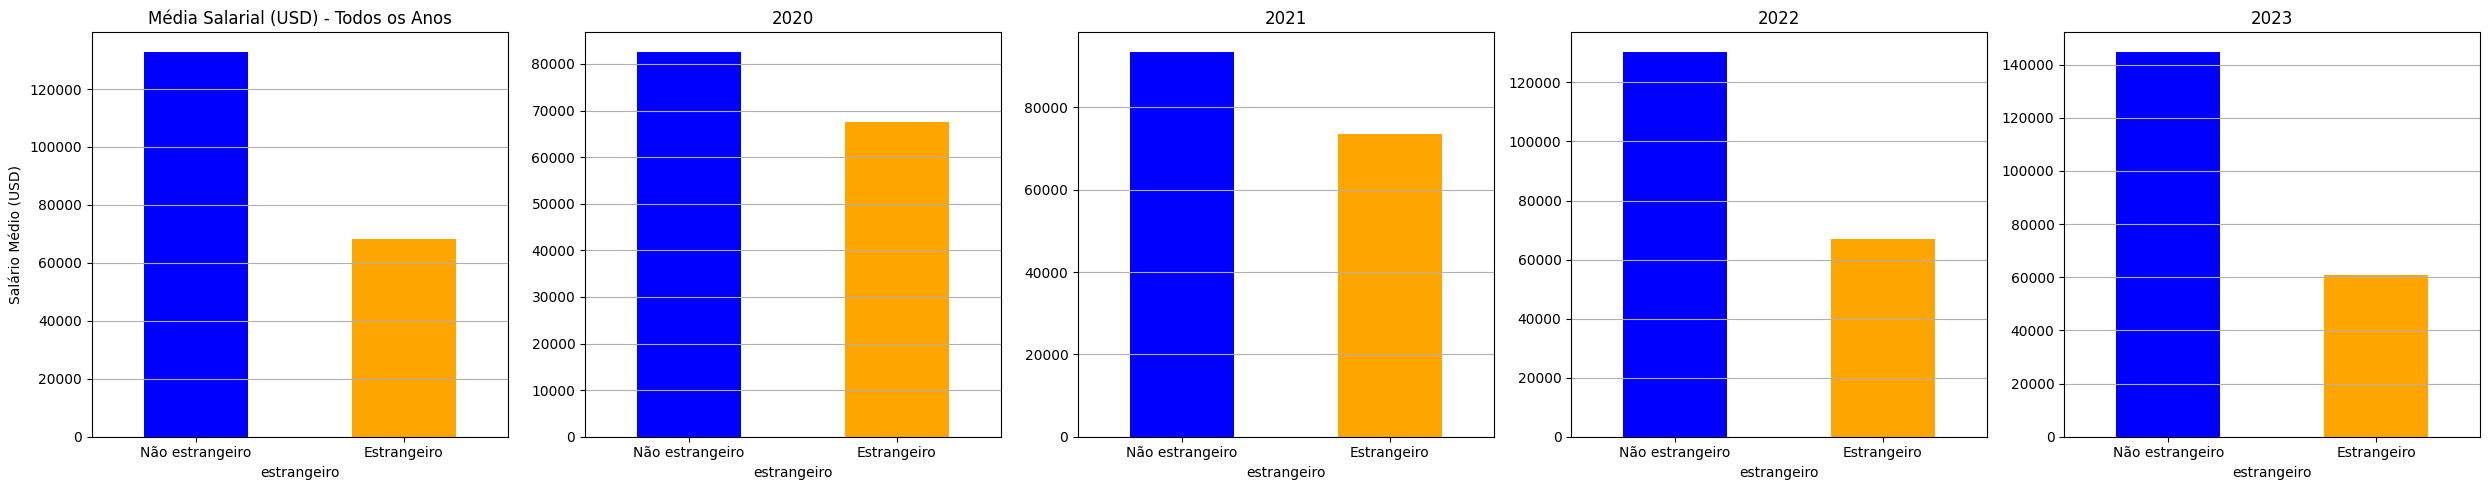

In [ ]:
import matplotlib.pyplot as plt

# Cópia para evitar warnings
df = df_sem_outliers_final.copy()

# Coluna de estrangeiros
df['estrangeiro'] = df['employee_residence'] != df['company_location']

# Lista de anos
anos = sorted(df['work_year'].unique())
n = len(anos) + 1  # gráfico geral + por ano

# Subplots lado a lado
fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

# GRÁFICO GERAL
media_geral = df.groupby('estrangeiro')['salary_in_usd'].mean().sort_index()
media_geral.plot(kind='bar', color=['blue', 'orange'], ax=axes[0])
axes[0].set_title('Média Salarial (USD) - Todos os Anos')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não estrangeiro', 'Estrangeiro'], rotation=0)
axes[0].set_ylabel('Salário Médio (USD)')
axes[0].grid(axis='y')

# Impressão no terminal
print("MÉDIA SALARIAL GERAL")
print(f"Não estrangeiro: ${media_geral[False]:,.2f}")
print(f"   Estrangeiro: ${media_geral[True]:,.2f}")
diff = media_geral[True] - media_geral[False]
pct = (diff / media_geral[False]) * 100 if media_geral[False] != 0 else 0
print(f" Diferença abs : ${diff:,.2f}")
print(f" Diferença %   : {pct:.2f}%\n")

# GRÁFICOS POR ANO
for i, ano in enumerate(anos):
    df_ano = df[df['work_year'] == ano]
    media_por_estrangeiro = df_ano.groupby('estrangeiro')['salary_in_usd'].mean()

    # Garante ambas as categorias
    if False not in media_por_estrangeiro:
        media_por_estrangeiro[False] = 0
    if True not in media_por_estrangeiro:
        media_por_estrangeiro[True] = 0

    media_por_estrangeiro = media_por_estrangeiro.sort_index()

    media_por_estrangeiro.plot(kind='bar', color=['blue', 'orange'], ax=axes[i+1])
    axes[i+1].set_title(f'{ano}')
    axes[i+1].set_xticks([0, 1])
    axes[i+1].set_xticklabels(['Não estrangeiro', 'Estrangeiro'], rotation=0)
    axes[i+1].set_ylabel('')
    axes[i+1].grid(axis='y')

    # Impressão no terminal
    print(f"MÉDIA SALARIAL EM {ano}")
    print(f"Não estrangeiro: ${media_por_estrangeiro[False]:,.2f}")
    print(f"   Estrangeiro: ${media_por_estrangeiro[True]:,.2f}")
    diff = media_por_estrangeiro[True] - media_por_estrangeiro[False]
    pct = (diff / media_por_estrangeiro[False]) * 100 if media_por_estrangeiro[False] != 0 else 0
    print(f" Diferença abs : ${diff:,.2f}")
    print(f" Diferença %   : {pct:.2f}%\n")

plt.tight_layout()
plt.show()


O código compara a média salarial (em dólares) entre profissionais que trabalham no país onde moram (não estrangeiros) e os que trabalham fora do país de residência (estrangeiros), tanto no geral quanto ano a ano

Faz a média geral dos salário de estrangeiros e não estrangeiros e atribui a cada ano

- Salário estrangeiro de 2021 a 2023 têm tido valorização negativa
- Salário não estrangeiro 2x mais valorizado que estrangeiro em 2023

##Cronologia da valorização do salário em países
- Pegar os países e ver quais países tiveram a maior valorização salarial de 2020 a 2023.
- Pegar os países e ver quais países tiveram a menor valorização salarial de 2020 a 2023.
- Pegar a média geral de salário por país considerando todos os anos.

Top 10 valorização absoluta:
company_location
CA    78532.000000
DE    58918.357143
NL    56289.000000
NG    55000.000000
MX    48089.000000
HR    45524.500000
US    40709.537274
PT    24313.833333
FR    18026.400000
ES    13559.444444
dtype: float64

Top 10 valorização percentual (%):
company_location
NG    550.000000
MX    143.502134
NL    134.021429
CA    118.894205
HR     99.795037
DE     87.732265
PT     66.623281
IN     44.522566
FR     36.004985
US     35.559305
dtype: float64


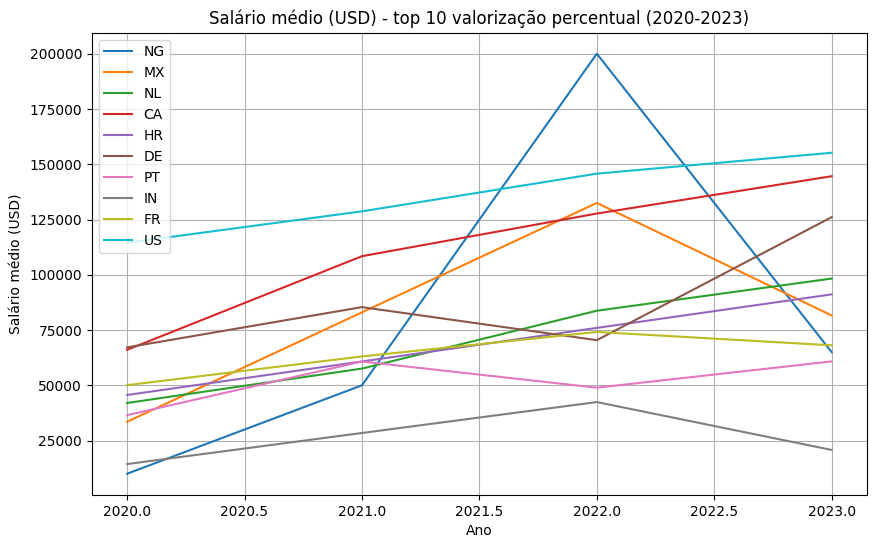

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

anos = [2020, 2021, 2022, 2023]
df_anos = df[df['work_year'].isin(anos)]  # Filtra dados dos anos desejados

# Média salarial por ano e país (linhas = anos, colunas = países)
media_ano_pais = df_anos.groupby(['work_year', 'company_location'])['salary_in_usd'].mean().unstack()

# Diferença absoluta do salário médio entre 2023 e 2020
val_abs = (media_ano_pais.loc[2023] - media_ano_pais.loc[2020]).sort_values(ascending=False)

# Diferença percentual do salário médio entre 2023 e 2020
val_pct = ((media_ano_pais.loc[2023] / media_ano_pais.loc[2020] - 1) * 100).sort_values(ascending=False)

# Mostrar top 10 países que mais valorizaram (absoluto e percentual)
print("Top 10 valorização absoluta:")
print(val_abs.head(10))

print("\nTop 10 valorização percentual (%):")
print(val_pct.head(10))

top10 = val_pct.head(10).index  # Seleciona top 10 países por valorização percentual

# Gráfico da evolução salarial média nos top 10 países
plt.figure(figsize=(10,6))
for pais in top10:
    sns.lineplot(x=media_ano_pais.index, y=media_ano_pais[pais], label=pais)

plt.title("Salário médio (USD) - top 10 valorização percentual (2020-2023)")
plt.xlabel("Ano")
plt.ylabel("Salário médio (USD)")
plt.legend()
plt.grid()
plt.show()




O gráfico selecionar os países do top 10 com maior valorização percentual salarial (2020 a 2023), e plota a valorização absoluta.

- O país Nigéria(NG), apresenta uma subida e queda abrupta pois há poucos dados em relação a Nigéria, por exemplo, em 2022, há apenas um registro de um sÊnior recebendo 200.000 usd, o que compromete a tabela. Porém o cálculo da valorização absoluta e percentula é feita em relação ao inícío e ao fim da linha, se mantendo fiel aos dados oferecidos.

#Conclusão

###Tratamento dos dados
- Alguns dados do dataset comprometeriam as plotagens, por exemplo, algum outlier que seja de algum company_location ou employee_residence que tenha poucas aparições influenciaria em certas tabelas




###Análise obtida das relações entre var alvo e as outras varíaveis
- Área em crescimento
- Nível de experiÊncia diretamente proporcional ao salário
- Heatmap indica pouquíssima relação entre salário e remote_radio ou company_size




###Outras análises
- Índia tem a maior porcentagem de exportação de cérebro
- Austrália tem a maior porccentagem de importação de cérebro



- VAlorização do não estrangeiro e desvalorização do estrangeiro
- Salário não estrangeiro tÊm crescido
- Salário estrangeiro tem se mantido estagnado e até decaído de acordo com os dados



- De acordo com os dados, o país com a maior valorização percentual de salário foi a Nigéria, apresentando um aumento de x5,5 no salário quando comparado a média de salário de 2020 e 2023
- O país com a maior valorização absoluta foi o Canadá, que teve um aumento de 78mil usd quando comparado a média do salário de 2020 e 2023

